# Dipole integrals and photoelecton observables (interferograms), Coulombic case

**Author: Paul Hockett, National Research Council of Canada, paul.hockett@nrc.ca, http://femtolab.ca**

To accompany the book Quantum Metrology with Photoelectrons, for more see:
* [Book webpages on femtolab.ca](http://femtolab.ca/?tag=metrology-book "Book webpages")
* [OSF project page (accompanying materials)](https://osf.io/q2v3g/ "OSF project page")
* [On Github (accompanying codes)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons "Book code')

v1, 28th August 2017

Latest version of this notebook on Github: https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/Coulombic_case/Dipole_integrals_coulombic.ipynb

***
The photoelectron wavefunction, for a Coulombic scatterer, $\Psi_{e}(\mathbf{r};\,k)$, can be calculated numerically. The hydrogenic bound states, $\psi_{nlm}^{hyd}(r)$, are also readily computed. Combining these functions allows the dipole matrix elements, $r_{klnl'}$, for photoionization in this simplest case to be calcualted, where these matrix elements are defined as:

$r_{klnl'} = \langle\chi_{kl}(r)|r|\chi_{nl'}(r)\rangle$

where $\chi_{nl'}(r)$ and $\chi_{kl}(r)$ are the radial parts of the bound and free state wavefunctions respectively.

The first section of this notebook defines all the necessary functions, while the latter part employs these matrix elements in the Cooper-Zare formalism to calculated photoelectron observables.

Note: the normalisation of some of these wavefunctions may not be consistent, the numerics need to be checked more carefully.


# Define wavefunctions

## Continuum functions

The continuum wavefunction for a Coulomb scattering potential can be expressed as [1,2]:

$\Psi_{e}(\mathbf{r};\,k)=\rho^{-1}\sum_{l=0}^{\infty}(2l+1)i^{l}e^{i\sigma_{l}}F_{l}(\eta;\rho)P_{l}(\cos\theta)$

where

$\eta=Z/k$

$\rho=kr$

$\sigma_{l}=\arg\Gamma\left[l+1-i\frac{Z_{1}Z_{2}}{k}\right]$, is the Coulomb scattering phase.

$F_{l}(\eta;\rho)$ is the (regular) Coulomb function, and $\Gamma$ is the gamma function.

An fuller exploration of these wavefunctions is given in the [Continuum Wavefunctions notebook](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/Coulombic_case/Continuum_wavefunctions.ipynb).

***
[1] [Rodberg & Thaler, Intoduction to the Quantum Theory of Scattering (1967)](https://books.google.ca/books/about/Introduction_to_the_Quantum_Theory_of_Sc.html?id=rdYyAAAAMAAJ&redir_esc=y)

[2] [Messiah, A. Quantum Mechanics (1961)](https://www.amazon.com/Quantum-Mechanics-Dover-Books-Physics/dp/048678455X/ref=mt_paperback?_encoding=UTF8&me=), [PDF via the internet archive](https://archive.org/details/QuantumMechanicsVolumeI)
***

In [1]:
# Import mpmath module for special functions
# See: Fredrik Johansson and others. mpmath: a Python library for arbitrary-precision floating-point arithmetic, December 2013. 
# http://mpmath.org/
from mpmath import mp

# Define correctly normalised continuum wavefunctions, assume Z=1, and values in atomic units
# Note that use of mp defined floats & complex numbers needs checking - types are mixed here.
# See http://mpmath.org/doc/current/functions/gamma.html?highlight=gamma#mpmath.gamma
#     http://mpmath.org/doc/current/basics.html#number-types
def psiE(l,k,r):
    eta=1/k
    rho=k*r
    # Fl=mp.coulombf(l+1-eta*1j,2*l+2,2*1j*rho) # Full definition for hypergeometric term
    Fl=mp.coulombf(l,eta,rho)  # Reduced defn., should be correct for mpmath function which already incorporates 1F1
    sigma=mp.arg(mp.gamma(l+1-(1j/k)))
    psi=(2*l+1)*(1j**(l))*mp.exp(1j*sigma)*Fl
    psi=psi/rho
    
    return psi

## Hydrogenic bound states

The bound states for hydrogen are given by:

$\psi_{nlm}^{hyd}(r,\theta,\phi)=\sqrt{\left(\frac{2}{na_{0}}\right)^{3}\frac{(n-l-1)!}{2n(n+l)!}}e^{-\varrho/2}\varrho^{l}L_{n-l-1}^{2l+1}(\varrho)Y_{l,m}(\theta,\phi)$

$\varrho=\frac{2r}{na_{0}}$

where $n$ is the principal quantum number, $a_{0}$ is the Bohr radius,
and $L_{n-l-1}^{2l+1}(\varrho)$ are Laguerre polynomials. Examples
of the radial parts of this solution are given below.

See, e.g., [wikipeadia](https://en.wikipedia.org/wiki/Hydrogen_atom), or Messiah's book, for details.

In [2]:
# Define radial part of function, set a0=1 for atomic units
def psiH(n,l,r):
    a0=1
    rho=2*r/(n*a0)
    Nl=mp.sqrt(((2/(n*a0))**3)*mp.fac(n-l-1)/(2*n*mp.fac(n+l)))  # Prefactor
    Lg=mp.laguerre(n-l-1,2*l+1,rho)
    psi=Nl*mp.exp(-rho/2)*(rho**l)*Lg
    
    return psi
   

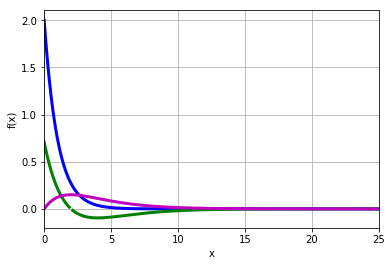

In [3]:
# Plot bound states, define functional form then use mpmath function plotter.
psi10=lambda x: psiH(1,0,x) # n=1, l=0
psi11=lambda x: psiH(1,1,x) # n=1, l=1
psi20=lambda x: psiH(2,0,x) # n=2, l=0
psi21=lambda x: psiH(2,1,x) # n=2, l=1
psi22=lambda x: psiH(2,2,x) # n=2, l=2

mp.plot([psi10, psi11, psi20, psi21, psi22],[0,25])

# Dipole integrals

Following the same treatment as the Cooper-Zare case (see [Cooper-Zare Model notebook](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/tree/master/Cooper-Zare_model)),
the dipole matrix elements can be split into radial and angular parts.
The radial part can now be expanded explicitly for Coulombic (hydrogenic) case using the radial wavefunctions given above:

$r_{klnl'} = \langle\chi_{kl}(r)|r|\chi_{nl'}(r)\rangle$

$ r_{klnl'} = \intop_{0}^{\infty}\mathrm{d}r\,r\rho^{-1}(2l+1)i^{l}e^{i\sigma_{l}}F_{l}(\eta;\rho)\sqrt{\left(\frac{2}{na_{0}}\right)^{3}\frac{(n-l'-1)!}{2n(n+l')!}}e^{-\varrho/2}\varrho^{l'}L_{n-l'-1}^{2l'+1}(\varrho)$

In [4]:
# Define radial integral
def rInt(n,lh,le,k):
    #psi1=psiE(le,k,r)
    #psi2=psiH(n,l,r)
    #rFunc=r*psi1*psi2
    rIntFunc=mp.quad(lambda r: psiE(le,k,r)*psiH(n,lh,r)*r,[0,25])
    
    return rIntFunc

In [5]:
# Check a single value.
rInt(1,0,1,1.5)

mpc(real='0.33915735478864745', imag='1.0929016622257077')

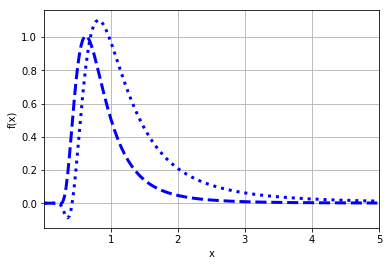

In [7]:
# Plot a range (takes a while!)
mp.plot(lambda k: rInt(2,1,1,k),[0.01,5.])

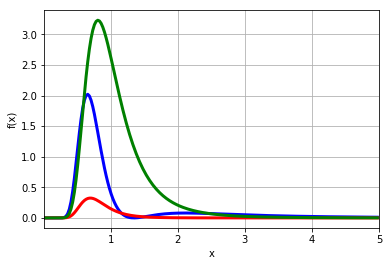

In [16]:
# Plot a range, output abs^2 values (takes a while!)
# Set transitions, |n,lh> -> |k,le>
rInt1SP=lambda k: mp.fabs(rInt(2,0,1,k))**2 # |2,0> -> |k,1>, i.e. 2s to p-wave transition
rInt2PS=lambda k: mp.fabs(rInt(2,1,0,k))**2 # |2,1> -> |k,0>, i.e. 2p to s-wave transition
rInt2PD=lambda k: mp.fabs(rInt(2,1,2,k))**2 # |2,1> -> |k,2>, i.e. 2p to d-wave transition

mp.plot([rInt1SP,rInt2PS,rInt2PD],[0.01,5.])

# Photoelectron observables

Calculate photoelectron observables as a fuction of energy and angle, using the CZ formalism (see [Cooper-Zare_model.ipynb](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/tree/master/Cooper-Zare_model) for details), combined with hydrogenic dipole matrix elements for the radial part of the problem.

## Define functions

In [9]:
# np for arrays
import numpy as np

# Load mathplotlib for plotting
import matplotlib.pyplot as plt

In [10]:
# Functions as Cooper-Zare_model.ipynb, but converted to mpmath types

# Define beta calculation, CZ formula, pass l (intial state quantum number), lp and lm (complex values for final states l+1, l-1)
def betaCZ(l,lp,lm):
    # Define x-sections sigma as square of radial matrix elements
    sigmaP=lp*mp.conj(lp)
    sigmaM=lm*mp.conj(lm)

    # Calculate beta
    # Use abs and phase values of the complex matrix elements for the interference term to match original CZ formalism.
    beta=(l*(l-1)*sigmaM)+((l+1)*(l+2)*sigmaP)-(6*l*(l+1)*mp.fabs(lp)*mp.fabs(lm)*mp.cos(mp.arg(lp)-mp.arg(lm)))
    beta=beta/((2*l+1)*(l*sigmaM+(l+1)*sigmaP))
    
    return beta

# Define plotting function. Set magnitudes and phase difference delta as variable.
def betaPlotPAD(l,lp,lm):

    # Calculate beta value
    beta=mp.re(betaCZ(l,lp,lm))
    print(beta)
    
    # Calculate PAD
    theta=np.linspace(0,2*np.pi,100)
    Itheta=1+beta*0.5*(3*np.cos(theta)**2-1)
    
    # Set cartesian coords
    # x=Itheta*np.cos(theta)
    # y=Itheta*np.sin(theta)
    
    # return (x,y)         # return cart
    return (Itheta,theta)  # return polar

In [11]:
# Define a funtion for the beta value to use with mpmath function plotter
def betaK(n,l,k):
    lm=rInt(n,l,l-1,k) # Radial matrix element for l-1
    lp=rInt(n,l,l+1,k) # Radial matrix element for l+1
    
    beta=mp.re(betaCZ(l,lp,lm))
    
    return beta
    

## Calculate observables

Use the CZ model with dipole matrix elements for the hydrogenic case in order to calculate photoelectron observables.

(0.126199987469342 + 0.0372612222583558j)
(-0.709433924951953 + 0.509320107532857j)
0.397375083570209


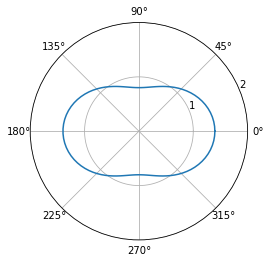

In [13]:
# Calculate for a single parameter set, plot PAD

# Set inputs
# Bound state
n=2
l=1   # Initial state l=0,1,2,3...n-1
# Continuum energy
k=1.5

# Calculate (hydrogenic) dipole matrix elements for le=l-1, l+1
lm=rInt(n,l,l-1,k) # Radial matrix element for l-1
#if l==0:  # Reset to 0 if (l-1)<0, this gives a zero-division error. Calculating a value with l=-1 seems OK however!
#    lm=0.+0.j
lp=rInt(n,l,l+1,k) # Radial matrix element for l+1

print(lm)
print(lp)

# Calculate PAD using hydrogenic matrix elements
(I,theta)=betaPlotPAD(l,lm,lp)

# Plot - polar style
ax = plt.subplot(111, projection='polar')
ax.plot(theta, I)
ax.set_rticks([1, 2])  # Reduce radial ticks
plt.show()

0.5
(0.372039653882248 - 0.048505639292475j)
(0.382654179182229 + 0.789337285700982j)
-0.128227372148794


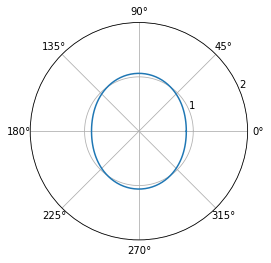

1.0
(0.371455074897771 + 0.115572468421951j)
(-0.948595130404377 + 1.31925125377446j)
0.374537541754648


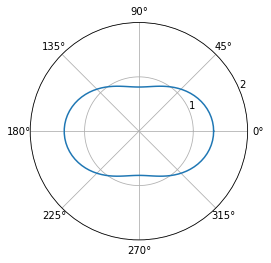

1.5
(0.126199987469342 + 0.0372612222583558j)
(-0.709433924951953 + 0.509320107532857j)
0.397375083570208


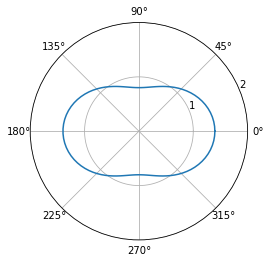

2.0
(0.0466648541228713 + 0.0116205910616415j)
(-0.408340507513916 + 0.204640247664051j)
0.33451554364528


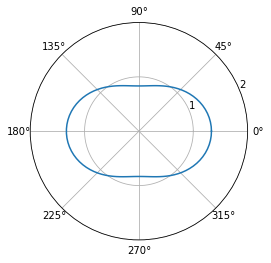

2.5
(0.0200327272260052 + 0.00421029539191959j)
(-0.240849862667866 + 0.0936235835235729j)
0.274519778174093


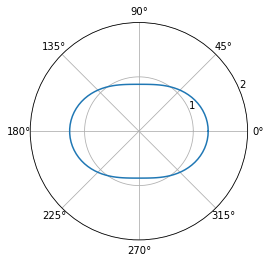

In [14]:
# Calculate for a range of k, plot PADs

# Set inputs
# Bound state
n=2
l=1   # Initial state l=0,1,2,3... Get a Gamma pole issue for n=l cases? Issue with fn. definition, or maybe correct...
# Loop over continuum energy
for k in mp.arange(0.5,3,0.5):
    print(k)

    # Calculate (hydrogenic) dipole matrix elements for le=l-1, l+1
    lm=rInt(n,l,l-1,k) # Radial matrix element for l-1
    #if l==0:  # Reset to 0 if (l-1)<0, this gives a zero-division error. Calculating a value with l=-1 seems OK however!
    #    lm=0.+0.j
    lp=rInt(n,l,l+1,k) # Radial matrix element for l+1

    print(lm)
    print(lp)

    # Calculate PAD using hydrogenic matrix elements
    (I,theta)=betaPlotPAD(l,lm,lp)

    # Plot - polar style
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta, I)
    ax.set_rticks([1, 2])  # Reduce radial ticks
    plt.show()


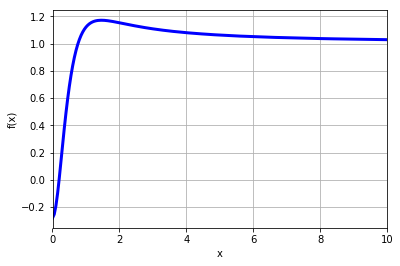

In [15]:
# Plot a range of betas (as fn. of k) using mp funtion plotter (takes a while!)
mp.plot(lambda k: betaK(2,1,k),[0.01,10])